# MOSFET Device Physics

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

matplotlib.rc('font', size=18)

A few definitions:

$V_{DS}$
: Voltage from drain to source.

$V_{GS}$
: Voltage from gate to source.

## Regimes of Operation

```{figure} ../images/fig1.svg
---
height: 350px
name: fig1
---
Physical model of a transistor and its circuit representation.
```

In this configuration, the transistor is off. The p-substrate is almost an 
insulator, and the transistor doesn't conduct. There's no current, because 
there's nowhere for it to go!

```{figure} ../images/fig2.svg
---
height: 350px
name: fig2
---
The gate voltage is less than the drain voltage, and the transistor is off.
```

The gate voltage is rising, repelling p-type carriers away from the channel.

In this situation, the electrons are still all attached to their atoms' nucleus
and are not moving. The negative ions are forming a depletion region; there are 
no free carriers, but the net charge of the region in the material is negative. 

Since there are no holes or carriers to conduct electrons, the current is still 
zero.

doping
: the introduction of impurities into a semiconductor crystal. It can leave 
  open holes for electrons to fill in the crystal lattice, or have too many 
  electrons to fill the valence shell. This means free carriers are introduced, 
  but since the total number of protons and electrons are equal, it still 
  leaves the material electrically neutral.

```{figure} ../images/fig3.svg
---
height: 350px
name: fig3
---
The gate voltage is greater than the drain voltage, the transistor is on, and
current starts to flow.
```

The gate voltage is now greater than the threshold voltage, and the electrons 
form a channel close to the gate. Free electrons can detach from their nucleus
and flow. Current flow from the drain to the source is now non-zero.

```{figure} ../images/fig4.svg
---
height: 350px
name: fig4
---
3D view of a MOSFET with length and width dimensions labelled.
```

Obviously, when $V_{\text{GS}} \lt V_{\text{th}}$, $I_D = 0$. When the gate 
voltage surpasses the threshold voltage, the current through the drain is given
by

$$
    I_D = \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left[ 2 (V_{\text{GS}} - V_{\text{th}}) V_{\text{DS}} - V_{DS}^2 \right]
$$ (id_vgs_gt_vth)

where $\mu$ is the electron mobility and $c_{\text{ox}}$ is the gate oxide 
capacitance per unit area.

The larger $L$ is, the smaller $I_D$ is. Conversely, the wider $W$ is, the
greater $I_D$ is.

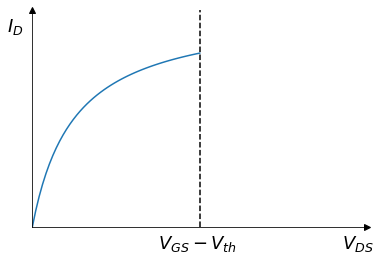

In [84]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = np.linspace(0,4)
y = x / (1 + x)
plt.plot(x, y)
plt.axvline(4, color='k', ls='--')
plt.xlim(0, 8)
plt.ylim(0, 1)
plt.text(-0.6, 0.9, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")
plt.text(3.0, -0.1, "$V_{GS} - V_{th}$")
# plt.show()
glue("boot_fig", fig, display=False)

```{glue:figure} boot_fig
:figwidth: 400px
:name: "fig-boot"

Current vs. drain voltage (assume $V_{GS} \gt V_{th}$).
```

Note that in the above plot, the current is initially linear until the
second term catches up. At $V_{\text{DS}} = V_{\text{GS}} - V_{\text{th}}$, pinchoff occurs. 

```{figure} ../images/fig5.svg
---
height: 350px
name: fig4
---
3D view of a MOSFET with length and width dimensions labelled.
```

```{figure} ../images/fig6.svg
---
height: 350px
name: fig4
---
3D view of a MOSFET with length and width dimensions labelled.
```

The channel is "pinched off." This means a further increase of $V_{\text{DS}}$ does not increase $I_D$.

```{note}
**So, is $I_D = 0$?**

No; the super strong electric field in the pinched off region causes any electron entering that field to be swept away (an across).
```

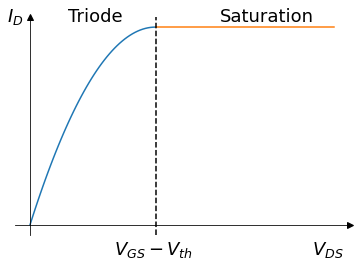

In [10]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


mu = 0.5
cox = 0.5
w = 1
l = 2
vth = 0.7
vgs = 4

vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y)

vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y)

plt.axvline(vgs-vth, color='k', ls='--')
# plt.xlim(0, 8)
# plt.ylim(0, 1)
plt.text(1, 0.7, "Triode")
plt.text(5, 0.7, "Saturation")

plt.text(-0.6, 0.7, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")
plt.text(2.2, -0.1, "$V_{GS} - V_{th}$")

glue("fig_current_triode_saturation", fig, display=False)

```{glue:figure} fig_current_triode_saturation
:figwidth: 400px
:name: "fig-triode-saturation"

Current vs. drain voltage (assume $V_{GS} \gt V_{th}$).
```

Analog designers mostly work in saturation, while digital designs usually operate in triode (and off).

## Current Equations

The current equations for triode and saturation are

$$
    I_D = \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left[ 2 (V_{\text{GS}} - V_{\text{th}}) V_{\text{DS}} - V_{DS}^2 \right]
$$ (id_triode)

and

$$
    I_D = \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)^2
$$ (id_triode)

respectively.

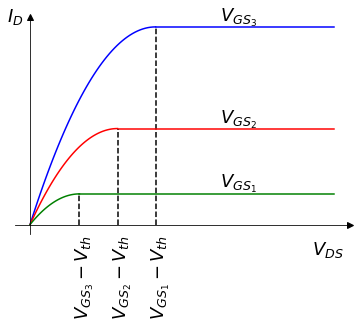

In [35]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


mu = 0.5
cox = 0.5
w = 1
l = 2
vth = 0.7

vgs = 4
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'b')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'b')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
plt.text(vgs-vth-0.15, -0.3, "$V_{GS_1} - V_{th}$", rotation=90)

vgs = 3
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'r')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'r')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
plt.text(vgs-vth-0.15, -0.3, "$V_{GS_2} - V_{th}$", rotation=90)

vgs = 2
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'g')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'g')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
plt.text(vgs-vth-0.15, -0.3, "$V_{GS_3} - V_{th}$", rotation=90)

plt.text(5, 0.7, "$V_{GS_3}$")
plt.text(5, 0.35, "$V_{GS_2}$")
plt.text(5, 0.13, "$V_{GS_1}$")

plt.text(-0.6, 0.7, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")

glue("fig_current_varying_vgs", fig, display=False)

```{glue:figure} fig_current_varying_vgs
:figwidth: 400px
:name: "fig-current-varying-vgs"

Current vs. drain voltage (assume $V_{GS} \gt V_{th}$).
```

The lower $V_{\text{GS}}$, the earlier the transition happens.

$V_{\text{th}}$ doesn't usually change; it's typically around $0.5 \text{V}$.

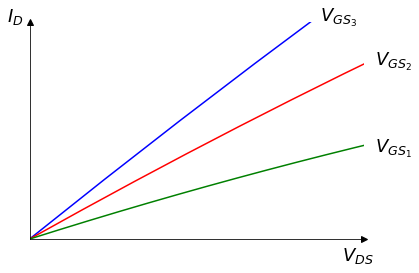

In [48]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


mu = 0.5
cox = 0.5
w = 1
l = 2
vth = 0.7

vgs = 4
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'b')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'b')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_1} - V_{th}$", rotation=90)

vgs = 3
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'r')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'r')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_2} - V_{th}$", rotation=90)

vgs = 2
vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y, 'g')
vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, 'g')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_3} - V_{th}$", rotation=90)

plt.xlim(0, 0.3)
plt.ylim(0, 0.1)

plt.text(0.26, 0.1, "$V_{GS_3}$")
plt.text(0.31, 0.08, "$V_{GS_2}$")
plt.text(0.31, 0.04, "$V_{GS_1}$")

plt.text(-0.02, 0.1, "$I_D$")
plt.text(0.28, -0.01, "$V_{DS}$")

glue("fig_current_varying_vgs_zoomed", fig, display=False)

```{glue:figure} fig_current_varying_vgs_zoomed
:figwidth: 400px
:name: "fig-zoomed-varying-vgs"

Current vs. drain voltage (assume $V_{GS} \gt V_{th}$).
```

The current resembles the I-V curve of a resistor when biased in this region.

In triode,

$$
    \frac{\partial I_D}{\partial V_{\text{DS}}} &= \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left[ 2 (V_{\text{GS}} - V_{\text{th}}) - 2 V_{\text{DS}} \right] \\
    &\approxeq \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)
$$

if $V_{\text{GS}} - V_{\text{th}} \gg V_{\text{DS}}$, and the resistance is given by

$$
    R = \left( \frac{\partial I_D}{\partial V_{\text{DS}}} \right)^{-1} \approxeq \frac{1}{\mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)}
$$

because resistance is defined as the inverse of the slope of the IV characteristic curve.

```{figure} ../images/fig7.svg
---
height: 200px
name: fig7
---
A MOSFET in triode can be used as a voltage-controlled resistor.
```

## Transconductance

transconductance
: Transconductance is an expression of the performance of a field-effect transistor (FET). In general, the larger the transconductance figure for a device, the greater the gain (amplification) it is capable of delivering, when all other factors are held constant. For a FET, transconductance is the ratio of the change in drain current to the change in gate voltage over a defined, arbitrarily small interval on the drain-current-versus-gate-voltage curve. The unit is the siemens.

Transconductance in saturation is given by:

$$
    g_m &= \frac{\partial I_D}{\partial V_{\text{GS}}} = \frac{\partial \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)^2 }{\partial V_{\text{GS}}} \\
    g_m &= \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right) \\
    g_m &= \sqrt{2 \mu c_{\text{ox}} \frac{W}{L} I_D} \\
    g_m &= \frac{2 I_D}{V_{\text{GS}} - V_{\text{th}}}
$$ (transconductance_saturation)

$g_m$ is the slope at some point $V_{\text{GS}}$.

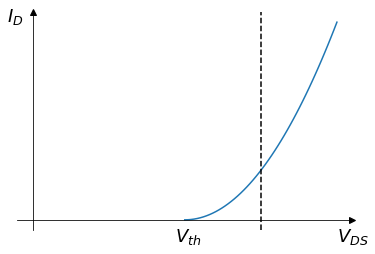

In [14]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = np.linspace(0.3, 0.6)
y = (x - 0.3)**2
plt.plot(x, y)
plt.axvline(0.45, color='k', ls='--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_3} - V_{th}$", rotation=90)

plt.text(0.28, -0.01, r"$V_{th}$")

plt.text(-0.05, 0.09, "$I_D$")
plt.text(0.6, -0.01, "$V_{DS}$")

glue("transconductance", fig, display=False)

```{glue:figure} transconductance
:figwidth: 400px
:name: "fig-transconductance"

$g_m$ is the slope at some point $V_{\text{GS}}$.
```

## Channel-length modulation

Channel-length modulation (CLM) is a second order effect that doesn't affect the IV curve as strongly. The channel length $L$ becomes smaller as $V_{\text{DS}}$ increases. As you increase $V_{\text{DS}}$, the pinchout zone gets a bit smaller, increasing $I_D$. Sometimes we ignore this effect.

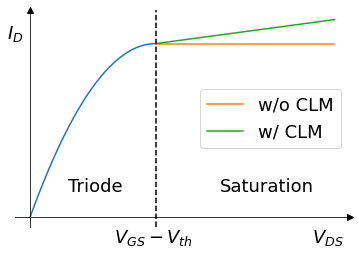

In [27]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


mu = 0.5
cox = 0.5
w = 1
l = 2
vth = 0.7
vgs = 4

vds = np.linspace(0,vgs-vth)
y = 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)
plt.plot(vds, y)

vds = np.linspace(vgs-vth, 8)
y = np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
plt.plot(vds, y, label="w/o CLM")

y = y + 0.02 * (vds - (vgs-vth))
plt.plot(vds, y, label="w/ CLM")

plt.axvline(vgs-vth, color='k', ls='--')
# plt.xlim(0, 8)
# plt.ylim(0, 1)
plt.text(1, 0.1, "Triode")
plt.text(5, 0.1, "Saturation")

plt.text(-0.6, 0.7, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")
plt.text(2.2, -0.1, "$V_{GS} - V_{th}$")

plt.legend(loc="center right")

glue("fig_current_with_CLM", fig, display=False)

```{glue:figure} fig_current_with_CLM
:figwidth: 400px
:name: "fig-current_with_CLM"

Current with and without channel-length modulation.
```

The corresponding equation when in saturation is

$$
    I_D = \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)^2 \left( 1 + \lambda V_{\text{DS}} \right)
$$ (current_in_saturation_CLM)

and its slope is

$$
    \frac{\partial I_D}{\partial V_{\text{DS}}} &= \frac{1}{2} \mu c_{\text{ox}} \frac{W}{L} \left( V_{\text{GS}} - V_{\text{th}} \right)^2 \lambda \\
    &= I_D \rvert_{\text{w/o CLM}} \times \lambda
$$

where $\lambda$ is a process parameter that varies with transistor length.

The smaller the architecture, the more pronounced CLM effects will be. This is bad for analog design! If you want a smaller slope, make $L$ bigger (or have a smaller current)!

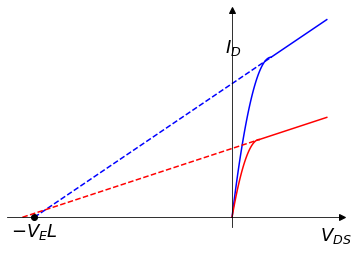

In [49]:
fig, ax = plt.subplots()

# Textbook style plots:
# https://stackoverflow.com/a/12998531/11530613
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
# Spines with arrows: 
# https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html
ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


mu = 0.5
cox = 0.5
w = 1
l = 2
vth = 0.7
lam = 0.5

def I_D_tri(mu, cox, w, l, vgs, vth, vds):
    """
    Params:
        mu, cox, w, l, vgs, vth: MOSFET physical characteristics
        vds: dependent variable
    """
    return 0.5 * mu * cox * w / l * (2 * (vgs - vth) * vds - vds**2)

def I_D_sat(mu, cox, w, l, vgs, vth, vds=None, lam=0):
    """
    Params:
        mu, cox, w, l, vgs, vth: MOSFET physical characteristics
        vds: dependent variable, optional
        lam: process parameter, optional
    """
    if lam == 0:
        return np.ones(vds.shape) * 0.5 * mu * cox * w / l * (vgs - vth)**2
    return 0.5 * mu * cox * w / l * (vgs - vth)**2 * (1 + lam * (vds - vds[0]))

vgs = 4
vds = np.linspace(0,vgs-vth)
y = I_D_tri(mu, cox, w, l, vgs, vth, vds)
plt.plot(vds, y, 'b')
vds = np.linspace(vgs-vth, 8)
y = I_D_sat(mu, cox, w, l, vgs, vth, vds, 0.05)
plt.plot(vds, y, 'b')
m = (y[-1] - y[0]) / (vds[-1] - vds[0])
b = y[0] - m * vds[0]
x0 = -b / m
x = np.linspace(x0, vgs-vth)
y = m * x + b
plt.plot(x, y, 'b--')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_1} - V_{th}$", rotation=90)

plt.plot(x0, 0, 'ko')
plt.text(x0-2, -0.08, "$-V_E L$")

vgs = 3
vds = np.linspace(0,vgs-vth)
y = I_D_tri(mu, cox, w, l, vgs, vth, vds)
plt.plot(vds, y, 'r')
vds = np.linspace(vgs-vth, 8)
y = I_D_sat(mu, cox, w, l, vgs, vth, vds, 0.05)
plt.plot(vds, y, 'r')
m = (y[-1] - y[0]) / (vds[-1] - vds[0])
b = y[0] - m * vds[0]
x0 = -b / m
x = np.linspace(x0, vgs-vth)
y = m * x + b
plt.plot(x, y, 'r--')
plt.plot([vgs-vth, vgs-vth], [0, y[0]], 'k--')
# plt.text(vgs-vth-0.15, -0.3, "$V_{GS_2} - V_{th}$", rotation=90)


# plt.text(5, 0.7, "$V_{GS_2}$")
# plt.text(5, 0.35, "$V_{GS_1}$")

plt.text(-0.6, 0.7, "$I_D$")
plt.text(7.4, -0.1, "$V_{DS}$")

glue("fig_early_voltage", fig, display=False)

```{glue:figure} fig_early_voltage
:figwidth: 400px
:name: "fig-early_voltage"

The per-channel-length early voltage.
```

If $V_E L \gg V_{\text{DS}}^{'}$:

$$
    m = \frac{I_D^{'}}{V_E L + V_{\text{DS}}^{'}} \approxeq \frac{I_D^{'}}{V_E L}
$$

and therefore

$$
    \lambda \approxeq \frac{1}{V_E L}
$$ (process_parameter)

## Body effect

Page 5

## Subthreshold conduction

Page 5

## MOSFET capacitance

Page 6

### MOSFET as a varactor

Page 7